# Forelesning 8: Dynamiske systemer


## Fartslover (ratelover)
Vi bruker følgende reaksjon som eksempel (vi later først som om den er reversibel):

$$ H_2 (g) + I_2 (g) \rightarrow 2HI (g)$$

Vi har følgende ratelov for reaksjonen:

$$\frac{d[HI]}{dt} = k_r[H_2][I_2]$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Konstanter og startbetingelser
k = 5E-2      # Reaksjonskonstant ved 420 grader C
HI0 = 0       # Startkonsentrasjon HI0 (mol/L)
I20 = 1       # Startkonsentrasjon I2 (mol/L)
H20 = 1       # Startkonsentrasjon H2 (mol/L)

# Tidsparametre
t0 = 0        # Starttid (s)
t_slutt = 2500 # Simuleringstid (s)
dt = 1E-1     # Tidssteg (s)
N = int((t_slutt - t0)/dt) + 1 # Antall punkter

# Arrayer
HI = np.zeros(N)
I2 = np.zeros(N)
H2 = np.zeros(N)
t = np.zeros(N)

HI[0] = HI0
I2[0] = I20
H2[0] = H20
t[0] = t0

# Simuleringsløkke
for i in range(N-1):
    # Regner ut dHI/dt, dH2/dt og dI2/dt
    dHIdt = k*H2[i]*I2[i]
    dH2dt = -0.5*dHIdt
    dI2dt = dH2dt
    # Eulers metode for å integrere
    HI[i+1] = HI[i] + dHIdt*dt
    H2[i+1] = H2[i] + dH2dt*dt
    I2[i+1] = I2[i] + dI2dt*dt
    t[i+1] = t[i] + dt

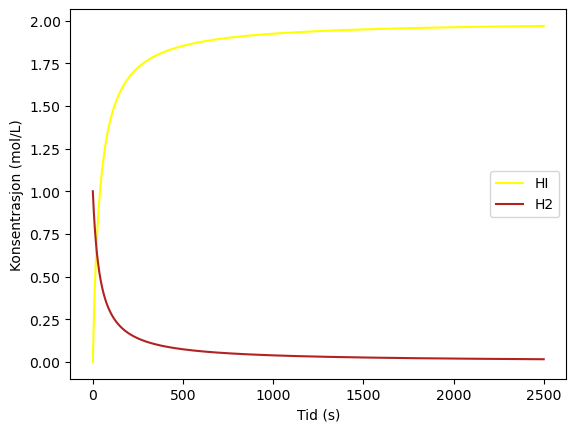

In [6]:
plt.plot(t, HI, label = "HI", color = "yellow")
plt.plot(t, H2, label = "H2", color = "firebrick")
plt.legend()
plt.xlabel("Tid (s)")
plt.ylabel("Konsentrasjon (mol/L)")
plt.show()

## Bruk av biblioteker

In [25]:
from scipy.integrate import solve_ivp

def fartslover(t, y): # y = [HI0, H20, I20]
    k = 5E-2
    HI = y[0]
    H2 = y[1]
    I2 = y[2]
    # Fartslovene
    HIder = k*H2*I2
    H2der = -0.5*HIder
    I2der = H2der
    return [HIder, H2der, I2der]

t0 = 0
t_slutt = 1000
y0 = [0, 1, 1]
t = np.linspace(t0, t_slutt, 100000)

y_int = solve_ivp(fartslover, [t0, t_slutt], y0, t_eval = t, method = "BDF")

In [23]:
kons_HI = y_int.y[0]
kons_H2 = y_int.y[1]
tid = y_int.t

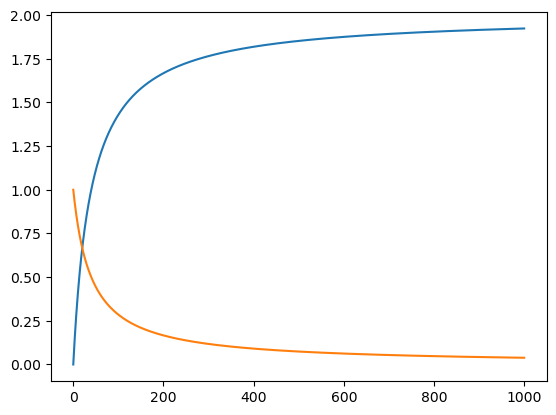

In [24]:
plt.plot(tid, kons_HI)
plt.plot(tid, kons_H2)
plt.show()